Challenge Técnico (Core)

Objetivo: Los estudiantes deberán participar en una competencia de Kaggle, realizar un análisis completo del dataset, entrenar y evaluar al menos cinco modelos diferentes, y realizar un benchmark para comparar su rendimiento. El resultado final debe ser subido a GitHub.

#  1. Registro en Kaggle y Elección de Competencia:

* Los estudiantes deben registrarse en Kaggle si no lo han hecho aún.
* Elegir una competencia activa que esté alineada con los conocimientos y técnicas aprendidas (por ejemplo, una competencia de clasificación o regresión).

#  2. Carga y Exploración Inicial de Datos:

* Descargar el dataset de la competencia.
* Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
* Identificar y documentar valores faltantes y outliers.


In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import Counter
from sklearn.model_selection import GridSearchCV

In [204]:
# cargar el dataset
data = pd.read_csv('../data/trainComp.csv')
print(data.shape)
print(data.columns)
data.info()
data.head(5)

(140700, 20)
Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [205]:
print("Valores faltantes:", data.isnull().sum())

Valores faltantes: id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


# 3. Análisis Exploratorio de Datos (EDA):
* Calcular estadísticas descriptivas básicas.
* Crear visualizaciones para entender la distribución de las variables y sus relaciones.
* Detectar y tratar valores faltantes y outliers.

In [206]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [207]:
data = data.drop(columns=['id'])

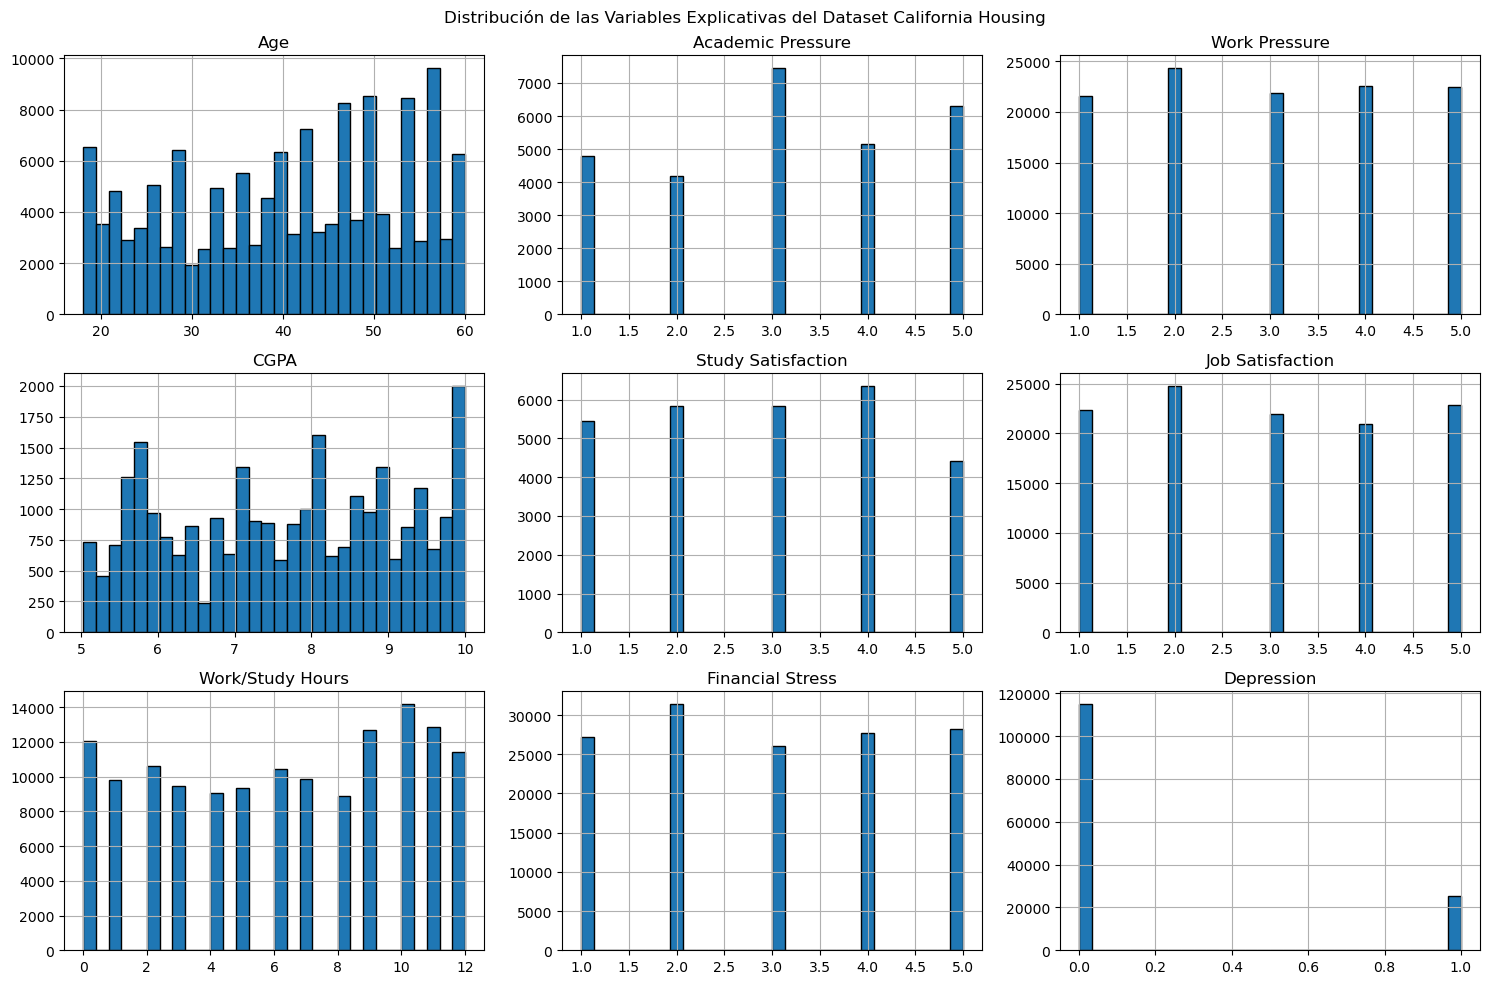

In [208]:
# Crear histogramas para cada característica
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset California Housing')
plt.tight_layout()
plt.show()

In [209]:
qsna=data.shape[0]-data.isnull().sum(axis=0)
qna=data.isnull().sum(axis=0)
ppna=round(100*(data.isnull().sum(axis=0)/data.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Study Satisfaction,27897,112803,80.17
Academic Pressure,27897,112803,80.17
CGPA,27898,112802,80.17
Profession,104070,36630,26.03
Work Pressure,112782,27918,19.84
Job Satisfaction,112790,27910,19.84
Dietary Habits,140696,4,0.00
Family History of Mental Illness,140700,0,0.00
Financial Stress,140696,4,0.00
Work/Study Hours,140700,0,0.00


## Valores nulos:
* Se toma la decision de eliminar las columnas y datos de estudiantes y trabajar solamente con la gente que trabaja,
ya que hay muchos mas datos de personas trabajando que de estudiantes.
* Esto permitira un mejor enfoque y precision en los modelos

In [210]:
# Filtrar el dataset eliminando las filas donde la columna 'Working Professional or Student' sea "student"
data = data[data['Working Professional or Student'] != 'Student']

In [211]:
data = data.drop(columns=['Working Professional or Student', 'Academic Pressure', 'Study Satisfaction', 'CGPA'])

In [212]:
data['Profession'] = data['Profession'].fillna('No aplica')

In [213]:
# eliminamos el resto de los valores faltantes
data = data.dropna()
data.shape

(112769, 15)

In [214]:
qsna=data.shape[0]-data.isnull().sum(axis=0)
qna=data.isnull().sum(axis=0)
ppna=round(100*(data.isnull().sum(axis=0)/data.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Name,112769,0,0.0
Gender,112769,0,0.0
Age,112769,0,0.0
City,112769,0,0.0
Profession,112769,0,0.0
Work Pressure,112769,0,0.0
Job Satisfaction,112769,0,0.0
Sleep Duration,112769,0,0.0
Dietary Habits,112769,0,0.0
Degree,112769,0,0.0


## Ajustando tipo de variables

In [215]:
# Seleccionar columnas de tipo object
object_columns = data.select_dtypes(include='object')

# Mostrar los nombres de las columnas
print(object_columns.columns.tolist())

['Name', 'Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [216]:
to_categorical_columns = {
    'Gender' : 'category', 
    'Profession' : 'category', 
    'Sleep Duration' : 'category', 
    'Dietary Habits' : 'category',                    
    'Degree' : 'category', 
    'Have you ever had suicidal thoughts ?' : 'category', 
    'Family History of Mental Illness' : 'category',
    'Depression' : 'bool'
}
data = data.astype(to_categorical_columns)
data.head(5)



,Name,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Aaradhya,Female,49.0,Ludhiana,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,False
1,Vivan,Male,26.0,Varanasi,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,True
3,Yuvraj,Male,22.0,Mumbai,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,True
4,Rhea,Female,30.0,Kanpur,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,False
5,Vani,Female,59.0,Ahmedabad,Finanancial Analyst,2.0,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,False


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112769 entries, 0 to 140698
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   Name                                   112769 non-null  object  
 1   Gender                                 112769 non-null  category
 2   Age                                    112769 non-null  float64 
 3   City                                   112769 non-null  object  
 4   Profession                             112769 non-null  category
 5   Work Pressure                          112769 non-null  float64 
 6   Job Satisfaction                       112769 non-null  float64 
 7   Sleep Duration                         112769 non-null  category
 8   Dietary Habits                         112769 non-null  category
 9   Degree                                 112769 non-null  category
 10  Have you ever had suicidal thoughts ?  112769 non

#  4. Preprocesamiento de Datos:

* Transformar las columnas según sea necesario (codificación de variables categóricas, escalado de características numéricas).
* Dividir el dataset en conjuntos de entrenamiento y prueba.

In [218]:
# Seleccionar columnas de tipo object
object_columns = data.select_dtypes(include='category')

# Mostrar los nombres de las columnas
print(object_columns.columns.tolist())
data.columns.to_list

['Gender', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


<bound method IndexOpsMixin.tolist of Index(['Name', 'Gender', 'Age', 'City', 'Profession', 'Work Pressure',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')>

In [225]:
# Seleccionar columnas 
X = data[['Gender', 'Age', 'Profession', 'Work Pressure',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness']] 
y = data['Depression']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir columnas categóricas y numéricas
numerical_columns = ['Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
categorical_columns = ['Gender','Profession',  'Sleep Duration', 'Dietary Habits', 'Degree', 
                       'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Definir transformaciones específicas para cada tipo de dato
preprocessor = ColumnTransformer(
    transformers=[    
        ('num', StandardScaler(), numerical_columns),  # Escalado numérico
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # Codificación categórica
    ]
)


#  5. Implementación de Modelos y Benchmark:

* Entrenar y evaluar al menos cinco modelos diferentes, como Regresión Logística, K-Nearest Neighbors (KNN), Árbol de Decisión, XGBoost y LightGBM.
* Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.
* Optimizar los hiperparámetros de los modelos seleccionados utilizando GridSearchCV o RandomizedSearchCV.
* Comparar el rendimiento de los modelos utilizando métricas adecuadas.

In [226]:
# Crear un pipeline para KNN
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=3, metric='manhattan'))
])

# Crear un pipeline para Random Forest)
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', RandomForestClassifier(n_estimators=50, max_depth=5, max_features='sqrt', random_state=42))
])

# Crear un pipeline para el árbol de decisión
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42))
])
# Crear un pipeline para xgboost
xg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgboost', XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42, use_label_encoder=False))
])
# Crear un pipeline para LGBM
lgbm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lgbm', LGBMClassifier(n_estimators=50, max_depth=5, num_leaves=15, random_state=42))
])


In [227]:
# Entrenar los modelos
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xg_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

c:\Users\IK\anaconda3\envs\ml_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:24:01] WARNING: D:\bld\xgboost-split_1732150467793\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 6478, number of negative: 72460
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 78938, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082064 -> initscore=-2.414623
[LightGBM] [Info] Start training from score -2.414623


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Work Pressure',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('lgbm',
                 LGBMClassifier(max_depth=5, n_estimators=50, num_leaves=15,
                                random_state=42))])

In [228]:
# Hacer predicciones con los modelos entrenados
knn_preds = knn_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
xg_preds = xg_model.predict(X_test)
lgbm_preds = lgbm_model.predict(X_test)

In [229]:
# Evaluar los modelos
print("KNN Performance:")
print(classification_report(y_test, knn_preds))
print("Accuracy:", accuracy_score(y_test, knn_preds))

print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

print("\nDecision Tree Performance:")
print(classification_report(y_test, dt_preds))
print("Accuracy:", accuracy_score(y_test, dt_preds))

print("\nXGBoost Performance:")
print(classification_report(y_test, xg_preds))
print("Accuracy:", accuracy_score(y_test, xg_preds))

print("\nLGBM Performance:")
print(classification_report(y_test, lgbm_preds))
print("Accuracy:", accuracy_score(y_test, lgbm_preds))

KNN Performance:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97     31091
        True       0.75      0.62      0.68      2740

    accuracy                           0.95     33831
   macro avg       0.86      0.80      0.83     33831
weighted avg       0.95      0.95      0.95     33831

Accuracy: 0.9520558068044102

Random Forest Performance:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96     31091
        True       1.00      0.00      0.00      2740

    accuracy                           0.92     33831
   macro avg       0.96      0.50      0.48     33831
weighted avg       0.93      0.92      0.88     33831

Accuracy: 0.9190978688185392

Decision Tree Performance:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98     31091
        True       0.79      0.60      0.68      2740

    accuracy                           0.95     338

In [232]:
# Por cuestiones de recursos computacionales se decidio usar solo un modelo
models = {
    "XGBoost": xg_model,
}

# Número de folds para la validación cruzada
cv_folds = 5

# Evaluar cada modelo con validación cruzada
for name, model in models.items():
    print(f"Evaluando modelo: {name}")
    # Calcular accuracy con validación cruzada
    scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy', n_jobs=-1)
    print(f"Mean Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})\n")

Evaluando modelo: XGBoost
Mean Accuracy: 0.9587 (+/- 0.0015)



In [234]:
# Definir los hiperparámetros a explorar
param_grid = {
    'xgboost__n_estimators': [50, 100],
    'xgboost__max_depth': [3, 5],
    'xgboost__learning_rate': [0.01, 0.1],
    'xgboost__subsample': [0.8, 1.0]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=xg_model,            # Pipeline con XGBoost
    param_grid=param_grid,         # Espacio de hiperparámetros
    scoring='accuracy',            # Métrica de evaluación
    cv=5,                          # Número de folds en la validación cruzada
    n_jobs=-1,                     # Paralelizar el proceso
)

# Ajustar el modelo al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y la métrica correspondiente
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

c:\Users\IK\anaconda3\envs\ml_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:47:17] WARNING: D:\bld\xgboost-split_1732150467793\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 5, 'xgboost__n_estimators': 100, 'xgboost__subsample': 0.8}
Best Accuracy: 0.9614633930939865


In [235]:
# Crear un pipeline para xgboost
xg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgboost', XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, 
                              random_state=42, subsample = 0.8, use_label_encoder=False))
])
xg_model.fit(X_train, y_train)

xg_preds = xg_model.predict(X_test)

print("\nXGBoost Performance:")
print(classification_report(y_test, xg_preds))
print("Accuracy:", accuracy_score(y_test, xg_preds))




c:\Users\IK\anaconda3\envs\ml_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:54:51] WARNING: D:\bld\xgboost-split_1732150467793\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98     31091
        True       0.82      0.69      0.75      2740

    accuracy                           0.96     33831
   macro avg       0.89      0.84      0.86     33831
weighted avg       0.96      0.96      0.96     33831

Accuracy: 0.9624309065649848


# 6) Resultados:

* La mejor metrica que podemos tomar para este dataset es la precision para el valor True, el cual indica que la persona 
es muy susceptible a tener depresion
* Para ese caso el XGBoost obtuvo el resultado mas confiable
* Despues de aplicar el gridsearchcv se pudo mejorar la precision del modelo XGBoost ademas las otras metricas como el recall y el f1-score para la variable true